Linear Regression
For the given ‘fish_datasets’, perform the following tasks:

Q1. Plot a bar chart showing the count of individual species?

Q2. Identify outliers and remove if any?

Q3. Build a regression model and print a regression equation?

Q4. What is the score of the model?


Q5. Compare real and predicted weights and give a conclusion statement based on it?


In [54]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [55]:
df=pd.read_csv('Fish_dataset.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [56]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [57]:
df.shape

(159, 7)

In [58]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [59]:
df.size

1113

In [60]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [61]:
value_counts = df['Species'].value_counts()
value_counts

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

<BarContainer object of 7 artists>

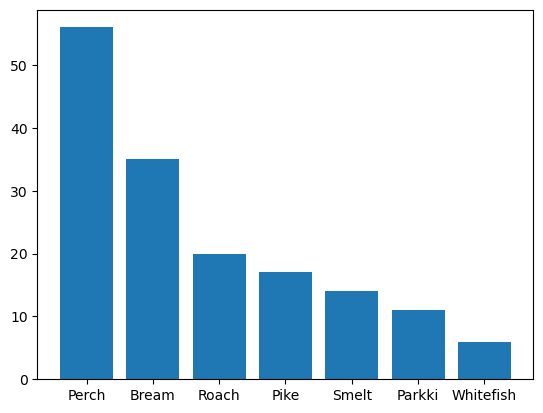

In [62]:
plt.bar(value_counts.index, value_counts.values)

REMOVING OUTLIERS

In [63]:
q1=df['Length2'].quantile(q=0.25)
q3=df['Length2'].quantile(q=0.75)
IQR=q3-q1
MAX_value=q3+(1.5*IQR)
mini_value=q1-(1.5*IQR)
print("maximum value {} \nminimum value {}".format(MAX_value,mini_value))
print('upper outlier = ',df[df['Length2']>MAX_value]['Length2'].count())
print('lower outlier =',df[df['Length2']<mini_value]['Length2'].count())

maximum value 57.25 
minimum value -0.75
upper outlier =  3
lower outlier = 0


In [64]:
for cols in df.columns[::]:
    if df[cols].dtype==object:
        continue
    else:
        q1=df[cols].quantile(q=0.25)
        q3=df[cols].quantile(q=0.75)
        IQR=q3-q1
    
        MAX_value=q3+(1.5*IQR)
        mini_value=q1-(1.5*IQR)
        df.loc[(df[cols]>MAX_value) | (df[cols]<mini_value)]=df[cols].median()

In [65]:
x=df['Species']

In [66]:
# standardization

In [67]:
df1=pd.get_dummies(x)

In [68]:
df=pd.concat([df,df1],axis=1)
df

,Species,Weight,Length1,Length2,Length3,Height,Width,7.786,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,False,True,False,False,False,False,False,False
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,False,True,False,False,False,False,False,False
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,False,True,False,False,False,False,False,False
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,False,True,False,False,False,False,False,False
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,False,True,False
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,False,True,False
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,False,True,False
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,False,True,False


In [69]:
df.drop('Species',inplace=True,axis=1)

In [70]:
df.shape

(159, 14)

<Axes: >

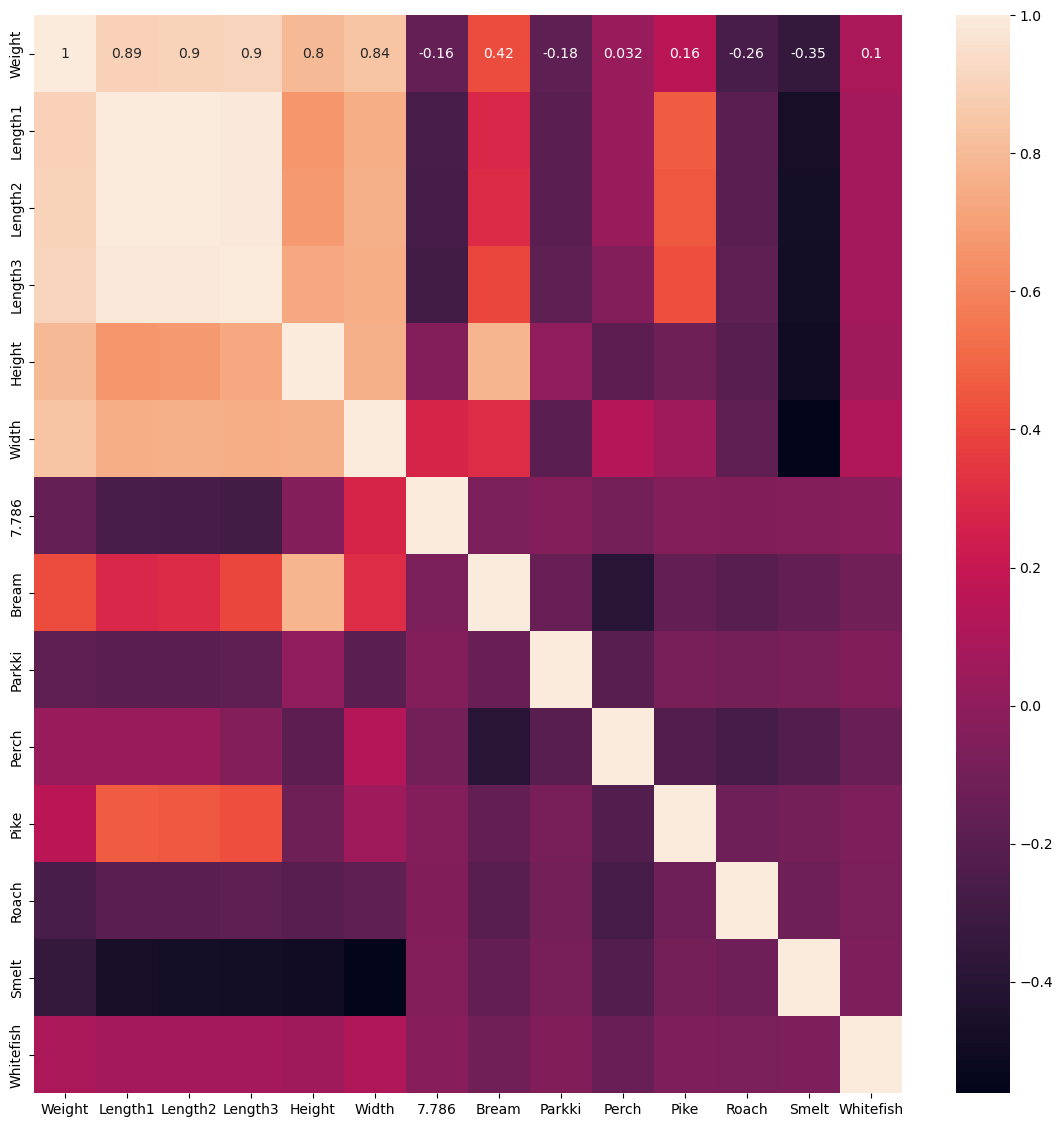

In [71]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

# weight vs all feature

In [72]:
x=df[[ 'Length1', 'Length2', 'Length3', 'Height',
       'Width']]

In [73]:
y=df['Weight']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,test_size = 0.2, random_state = 40)

In [76]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [77]:
model.fit(x,y)

LinearRegression()

In [78]:
y_test_pred=model.predict(X_test)

In [79]:
y_train_pred=model.predict(X_train)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [81]:
LearnR2=r2_score(Y_train,y_train_pred)
LearnR2

0.8976441085635988

In [82]:
LearnR2=r2_score(Y_test,y_test_pred)
LearnR2

0.8944117370877515

# Ridge
*use for managing the overfitting.

In [87]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train,Y_train)

Ridge()

In [88]:
y_pre_rigde_train=ridge_reg.predict(X_train)
y_pre_rigde_test=ridge_reg.predict(X_test)

In [91]:
print(ridge_reg.score(X_test,Y_test))
print(ridge_reg.score(X_train,Y_train))

0.8864350648422885
0.8986967287997012


In [96]:
#Elasticnet

In [93]:
from sklearn.linear_model import ElasticNet
En_reg=ElasticNet()
En_reg.fit(X_train,Y_train)

ElasticNet()

In [97]:
En_reg.score(X_test,Y_test)

0.8928448822542118

In [98]:
En_reg.score(X_train,Y_train)

0.8912243305157916

In [99]:
#lasso

In [102]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train,Y_train)
y_pred_lasso_train=lasso_reg.predict(X_train)
y_pred_lasso_test=lasso_reg.predict(X_test)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+05, tolerance: 1.231e+03
  model = cd_fast.enet_coordinate_descent(


In [104]:
print(lasso_reg.score(X_test,Y_test))
print(lasso_reg.score(X_train,Y_train))

0.8881413746080982
0.8984283178638365


In [105]:
lasso_reg.score(X_test,y_pred_lasso_test)

1.0

In [106]:
#simple regreation analysis

In [112]:
x=df['Width'].values.reshape(-1,1)
y=df['Weight']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,test_size = 0.2, random_state = 40)

In [114]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [115]:
model.fit(x,y)



LinearRegression()

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [117]:
LearnR2=r2_score(Y_train,y_train_pred)
LearnR2

0.8976441085635988

In [118]:
LearnR2=r2_score(Y_test,y_test_pred)
LearnR2

0.8944117370877515

# Cross Validation (CV)
1.P-out cv

2.1-out cv - every single data will be tested and train which is traditional methid.

3.k-fold cv  - k-fold cv will provide you with more confidence in your prediction

4.startified cv - only use for categorical target column.

*cross validation is experiment 


*the method that we are using currently is hold out validation method

*most of the time k-fold and stratified method are use.